# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [3]:
cat=Table.read('./data/dmu26_XID+PACS_CDFS-SWIRE_cat.fits')


In [4]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J033554.337-295349.542,53.97640517002286,-29.897095125991797,12.878391,27.787066,3.3857768,9.144336,19.615335,2.7962306,4.6603627,2.6181266,0.12202745,0.12470876,0.9998652,0.9994783,2607.9473,2850.74,0.0,0.0
HELP_J033507.581-295403.176,53.78158800002285,-29.900882185991797,18.010164,35.480762,5.8441725,13.572009,27.291685,4.3143663,4.3375893,2.6507478,0.13483807,0.124096975,1.0017751,0.9993454,1629.969,2170.6199,0.0,0.0
HELP_J033510.718-295421.402,53.79465783002286,-29.9059451159918,33.340416,52.09296,14.42746,20.306192,41.544506,5.990246,4.3375893,2.6507478,0.13483807,0.124096975,1.0001394,0.99922967,1617.6096,1434.3932,0.0,0.0
HELP_J033506.496-295259.888,53.77706476002285,-29.883302115991796,12.762015,27.967695,3.3230793,10.358154,22.31918,2.8579369,4.3375893,2.6507478,0.13483807,0.124096975,0.99907,0.99932134,2635.4138,2339.7256,0.0,0.0
HELP_J033508.991-295248.602,53.78746131002285,-29.8801673559918,130.55115,150.82114,109.47153,103.92248,121.72868,84.70626,4.3375893,2.6507478,0.13483807,0.124096975,1.0000745,0.9994503,2345.8413,2259.4453,0.0,0.0
HELP_J033511.182-295419.079,53.796592700022856,-29.9052998459918,24.03841,42.531387,7.908724,63.196434,88.88186,36.18385,4.3375893,2.6507478,0.13483807,0.124096975,1.0029503,0.9989946,1748.9468,1324.666,0.0,0.0
HELP_J033448.711-295226.848,53.70296347002285,-29.8741244059918,19.940718,38.758873,6.155506,80.36125,99.992,61.34235,5.7486567,2.5429063,0.13678244,0.13192563,1.0000415,0.99946076,1731.5681,2136.6235,0.0,0.0
HELP_J033449.905-295331.170,53.70793903002286,-29.891991685991798,14.65932,31.270279,4.4414625,8.067963,17.98498,1.9909194,5.7486567,2.5429063,0.13678244,0.13192563,1.000128,0.9984087,2275.5486,2385.444,0.0,0.0


In [5]:
from astropy import units as u
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree

## Look at Symmetry of PDFs to determine depth level of catalogue

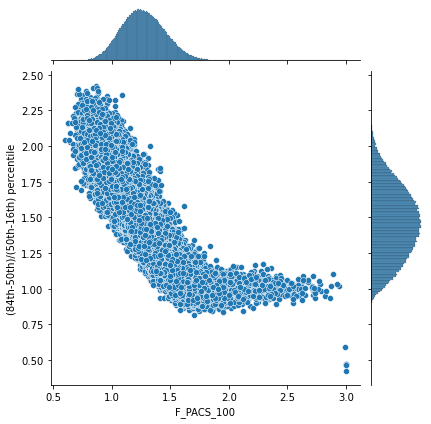

In [6]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_100']),y=skew, kind='scatter')

For 100 $\mathrm{\mu m}$ depth is ~ 30mJy

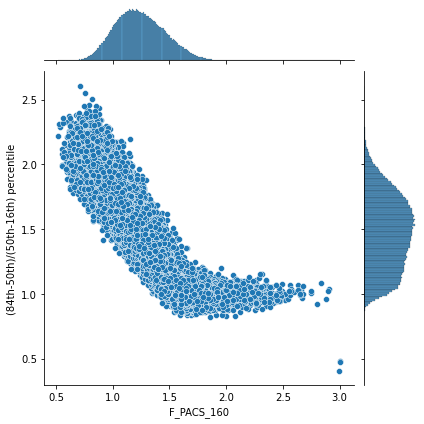

In [7]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_160']),y=skew, kind='scatter')

For 160 $\mathrm{\mu m}$ depth is ~ 30mJy

## Add flag to catalogue

In [8]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [9]:
ind_100=(cat['Pval_res_100']>0.5) | (cat['F_PACS_100'] < 30)
ind_160=(cat['Pval_res_160']>0.5) | (cat['F_PACS_160'] < 30) 


In [10]:
print(ind_100.sum(),ind_160.sum(),len(cat))

243314 240701 283406


In [11]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True


In [12]:
cat.write('./data/dmu26_XID+PACS_CDFS-SWIRE_cat_20201210.fits', format='fits',overwrite=True)


## Check maps

In [13]:
from astropy.io import fits

In [14]:
pacs100_pval_old=fits.open('./data/old/dmu26_XID+PACS_PACS_100_CDFS-SWIRE_Bayes_Pval_20171005.fits')
pacs160_pval_old=fits.open('./data/old/dmu26_XID+PACS_PACS_160_CDFS-SWIRE_Bayes_Pval_20171005.fits')

In [15]:
pacs100_pval=fits.open('./data/dmu26_XID+PACS_PACS_100_CDFS-SWIRE_Bayes_Pval_20201210.fits')
pacs160_pval=fits.open('./data/dmu26_XID+PACS_PACS_160_CDFS-SWIRE_Bayes_Pval_20201210.fits')

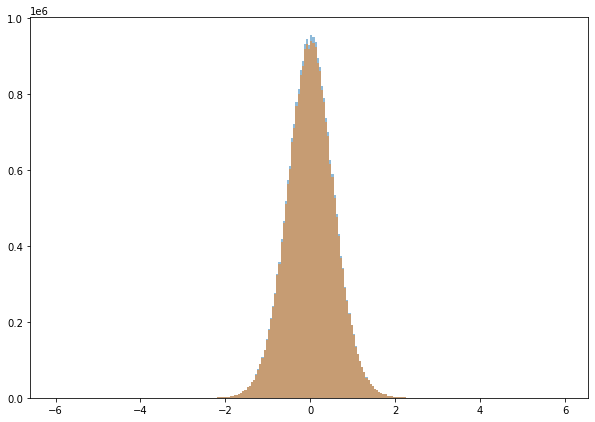

In [19]:
plt.figure(figsize=(10, 7))
plt.hist(pacs100_pval[1].data[np.isfinite(pacs100_pval[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='new');
plt.hist(pacs100_pval_old[1].data[np.isfinite(pacs100_pval_old[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='old');

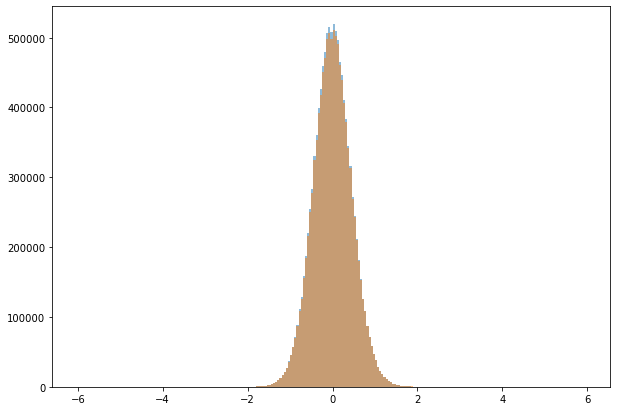

In [20]:
plt.figure(figsize=(10, 7))
plt.hist(pacs160_pval[1].data[np.isfinite(pacs160_pval[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='new');
plt.hist(pacs160_pval_old[1].data[np.isfinite(pacs160_pval_old[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='old');

## Check cat

In [21]:
# old_cat=Table.read('../data/CDFS-SWIRE/PACS/WP4-CDFS-SWIRE-PACSxID24-v1.fits.gz')
old_cat=Table.read('./data/old/dmu26_XID+PACS_CDFS-SWIRE_cat_20171019.fits')

In [22]:
old_cat['RA'].unit=u.degree
old_cat['Dec'].unit=u.degree

In [23]:
old_cat

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool
HELP_J033650.824-295620.783,54.211766390022845,-29.9391064859918,6.8727474,16.224459,1.785968,13.625306,27.391935,4.3266177,5.8503656,4.1451654,3.9567904,0.28923923,1.0005544,1.0009332,2000.0,2000.0,0.003,0.0,True,True
HELP_J033655.442-295449.596,54.23101021455793,-29.91377659143576,20.696299,36.83857,7.1725364,52.53022,71.8413,33.71534,5.0740747,4.701835,2.5096633,0.2738073,0.9991376,1.000281,2000.0,1069.0,0.0,0.0,True,False
HELP_J033616.314-295548.181,54.067976200022855,-29.9300503059918,20.486929,36.984634,7.2630677,10.095359,21.949137,3.0481908,4.868174,3.0936785,0.16212074,0.15005113,0.9986873,0.9985945,2000.0,2000.0,0.0,0.0,True,True
HELP_J033601.094-295546.425,54.00455690002285,-29.929562435991798,26.03941,45.095226,10.399402,35.170345,55.48682,17.586811,3.9518476,4.148871,0.16864845,0.16087689,0.9991478,0.9995499,1100.0,1228.0,0.0,0.0,True,False
HELP_J033606.888-295518.496,54.028701300022846,-29.9218044959918,19.18041,37.2356,6.110492,12.366629,26.795029,3.8475146,4.584858,3.36094,0.13712929,0.1368899,1.0017686,1.0003046,2000.0,2000.0,0.0,0.0,True,True
HELP_J033607.350-295516.790,54.030623590022856,-29.9213304359918,37.047855,57.853382,18.339502,16.742409,31.44188,5.5569715,4.584858,3.36094,0.13712929,0.1368899,0.99862367,1.0016358,2000.0,1629.0,0.0,0.0,False,True
HELP_J033610.856-295506.940,54.04523478002285,-29.918594405991797,38.94254,60.46598,19.75341,39.934933,58.855495,20.53892,4.584858,3.36094,0.13712929,0.1368899,0.99846005,1.0012609,1430.0,891.0,0.0,0.0,False,False
HELP_J033555.160-295410.647,53.97983175002285,-29.9029574059918,140.71725,159.88882,121.06517,98.45694,115.29891,81.25309,4.326003,3.0835671,0.15031452,0.1307106,0.9997334,0.9998021,2000.0,2000.0,0.0,0.0,False,False


In [24]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=cat['RA'], dec=cat['Dec'])  
catalog = SkyCoord(ra=old_cat['RA'], dec=old_cat['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

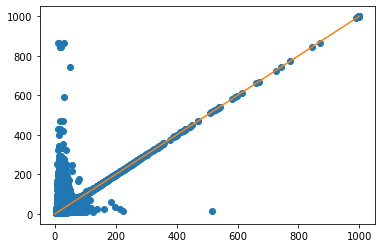

In [25]:
plt.plot(cat['F_PACS_100'],old_cat['F_PACS_100'][idx],'o' )
plt.plot(np.arange(0,1000),np.arange(0,1000))

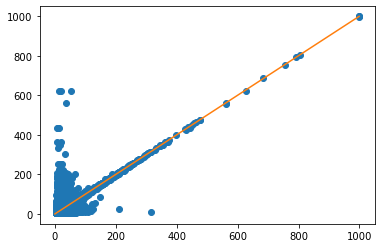

In [27]:
plt.plot(cat['F_PACS_160'],old_cat['F_PACS_160'][idx],'o' )
plt.plot(np.arange(0,1000),np.arange(0,1000))

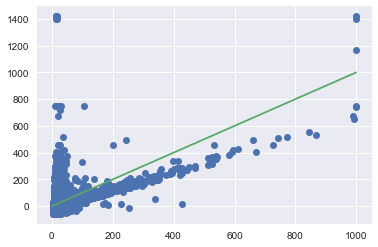

In [34]:
# plt.plot(cat['F_PACS_100'],old_cat['F_PACS_100'][idx],'o' )
# plt.plot(np.arange(0,1000),np.arange(0,1000))

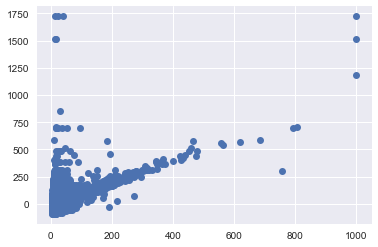

In [33]:
# plt.plot(cat['F_PACS_160'],old_cat['F_PACS_160'][idx],'o' )